## Análise de FP e FN

<br>

Neste Notebook será analisado os documentos que foram classificados errados e tentar entender o porquê.

In [1]:
# Importando Ferramentas Básicas

import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

Importante notar que esses são os dados para:

<br>

- ***Modelo*** = ComplementNB 
<br>

- ***Num Atributos*** = 500
<br>

-  ***Random State*** = 99
<br>

- ***Tamanho Teste*** = 25%

In [89]:
# Importando Dados

FP = pd.read_csv('False Positive_ComplementNB_500.csv')
FN = pd.read_csv('False Negative_ComplementNB_500.csv')
Total = pd.read_csv('noticias_final_alterado_limpo_500.csv')
atributos = pd.read_csv('noticias_final_500_atributos_selecionados.csv')

In [74]:
# Juntando os dados

Total['Classificação'] = ['Errado' if index in list(FP['Unnamed: 0'] + FN['Unnamed: 0']) else 'Certo' for index in Total.index]

# Visualizando modificações
Total.head()

,assunto,categoria,lista_tokens,tamanho_lista_tokens,Classificação
0,﻿\n novo plano de investimento da petrobras s...,1,"['queda', 'bilhões', 'resposta', 'fontes', 'em...",23,Certo
1,﻿\n\npor *lauro jardim*\n\n10/01/2016 • 06:31\...,1,"['estima', 'dias', 'divulgaçãodivulgação', 'em...",4,Certo
2,﻿ grupo francês cnp negocia compra da pan seg...,1,"['ano', 'poderia', 'mercado', 'divisão', 'açõe...",12,Certo
3,﻿ destino de distribuidoras da eletrobras pod...,1,"['unânime', 'advogados', 'bilionário', 'martin...",20,Certo
4,﻿ banco suíço fez oferta ao btg por controle ...,1,"['credit', 'negócios', 'ano', 'autoridade', 'e...",18,Certo


Vamos agora ver qual é a relação entre o número de tokens e classificação.

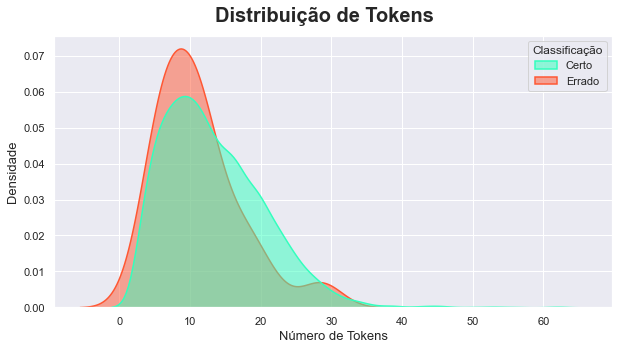

In [88]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize = (10,5))

ax = sns.kdeplot(data = Total, 
                  x = 'tamanho_lista_tokens',
                  hue = 'Classificação',
                  palette = {"Certo": "#33FFBD",  'Errado': "#FF5733"},
                  fill = True, 
                  common_norm = False, 
                  alpha = .5, 
                  linewidth = 1.5)

fig.suptitle('Distribuição de Tokens', fontsize = 20, fontweight = 'bold', y = 0.96)

plt.ylabel('Densidade', fontsize = 13, y = 0.5)
plt.xlabel('Número de Tokens', fontsize = 13, x = 0.5)

fig.savefig('Distribuicao_Tokens.png');